# Вебинар 2. Предобработка данных.

**Подключение библиотек и скриптов**

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

**Пути к директориям и файлам**

In [145]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'

### Загрузка данных

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [7]:
? pd.read_csv

In [146]:
df = pd.read_csv(DATASET_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [147]:
df.shape

(20640, 11)

### Приведение типов данных

In [148]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
id                      int64
dtype: object

In [149]:
df['id'].dtype

dtype('int64')

In [150]:
df['id'] = df['id'].astype(str)
df['id'].dtype

dtype('O')

### Обзор количественных переменных

In [151]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [152]:
a = np.array([1,4,5,6,7,90,100,708,1000000])
print(a.mean())
print(np.median(a))

111213.44444444444
7.0


In [153]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Корреляция признаков

In [154]:
df_num_features.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.010432,-0.042841,0.027778,0.036120,0.050929,0.031647,0.000711,-0.012281
latitude,-0.010432,1.000000,-0.009007,0.004204,0.004542,0.004031,0.004511,-0.015697,-0.017672
housing_median_age,-0.042841,-0.009007,1.000000,-0.361280,-0.320211,-0.295900,-0.303030,-0.117943,0.106582
total_rooms,0.027778,0.004204,-0.361280,1.000000,0.930380,0.856635,0.918484,0.198050,0.134153
total_bedrooms,0.036120,0.004542,-0.320211,0.930380,1.000000,0.877791,0.979728,-0.007723,0.049686
population,0.050929,0.004031,-0.295900,0.856635,0.877791,1.000000,0.907201,0.004571,-0.024425
households,0.031647,0.004511,-0.303030,0.918484,0.979728,0.907201,1.000000,0.013033,0.065843
median_income,0.000711,-0.015697,-0.117943,0.198050,-0.007723,0.004571,0.013033,1.000000,0.688075
median_house_value,-0.012281,-0.017672,0.106582,0.134153,0.049686,-0.024425,0.065843,0.688075,1.000000


### Обзор номинативных переменных

In [155]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,ocean_proximity,id
0,NEAR BAY,0
1,NEAR BAY,1
2,NEAR BAY,2
3,NEAR BAY,3
4,NEAR BAY,4


In [156]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: ocean_proximity, dtype: int64

### Обработка пропусков

In [157]:
df.isna().sum(axis = 0)

longitude               0
latitude                0
housing_median_age    722
total_rooms             0
total_bedrooms        207
population            599
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

**housing_median_age**

In [158]:
df.loc[df['housing_median_age'].isnull(), 'housing_median_age'] = df['housing_median_age'].median()

**total_bedrooms**

In [159]:
df.loc[df['total_bedrooms'].isnull(), 'total_bedrooms'] = df['total_bedrooms'].median()

**population**

In [160]:
df.loc[df['population'].isnull(), 'population'] = df['population'].median()

**ocean_proximity**

In [161]:
df['ocean_proximity'].mode()[0]

'<1H OCEAN'

In [121]:
df.replace({'ocean_proximity': {'-':df['ocean_proximity'].mode()[0]}}, inplace=True)

In [163]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

### Обработка выбросов

In [164]:
# Смотрим наблюдения, где кол-во спальных комнат больше кол-ва всех комнат
df[df['total_rooms'] < df['total_bedrooms']]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
2826,-119.11,35.42,52.0,154.0,435.0,37.0,16.0,10.0263,200000.0,INLAND,2826
9877,-121.85,36.61,38.0,238.0,435.0,191.0,67.0,1.3897,125000.0,<1H OCEAN,9877
9942,-122.23,38.17,45.0,350.0,435.0,225.0,72.0,1.8942,216700.0,NEAR BAY,9942
13597,-117.28,34.09,44.0,376.0,435.0,273.0,107.0,2.2917,90800.0,INLAND,13597
19391,-120.85,37.78,25.0,421.0,435.0,303.0,106.0,2.2679,71300.0,INLAND,19391


In [165]:
#Находим коэфф, во сколько раз total_bedrooms больше total_rooms
(df['total_rooms']/df['total_bedrooms']).median()

4.922249954204067

In [166]:
df.loc[df['total_rooms'] < df['total_bedrooms'], 'total_bedrooms'] = df.loc[df['total_rooms'] < df['total_bedrooms'], 'total_rooms']/(df['total_rooms']/df['total_bedrooms']).mean()

In [167]:
#Проверка
df[df['total_rooms'] < df['total_bedrooms']]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id


In [168]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.00000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.665746,2635.763081,536.74841,1417.860562,499.539680,3.870671,206855.816909
std,5.041408,94.903955,12.355019,2181.615252,419.45420,1119.445348,382.329753,1.899822,115395.615874
min,-124.350000,-13534.030000,1.000000,2.000000,1.00000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.00000,797.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.00000,1165.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.25000,1701.000000,605.000000,4.743250,264725.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.00000,35682.000000,6082.000000,15.000100,500001.000000


**longitude**

In [169]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423


In [170]:
df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1

In [171]:
df.loc[df['longitude'] == 0, 'longitude'] = df['longitude'].median()

**latitude**

In [172]:
df[(df['latitude'] <= 20) | (df['latitude'] > 45)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283
12772,-121.42,1327.13,29.0,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772


In [173]:
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = df['latitude'].median()

### Отбор и построение новых признаков

**Исключаем признак "id"**

In [174]:
#df.drop('id', axis = 'columns')
df = df[df.columns[:-1]]

**Преобразуем категориальный признак "ocean_proximity" в несколько бинарных**

In [175]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)


C:\Users\User\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


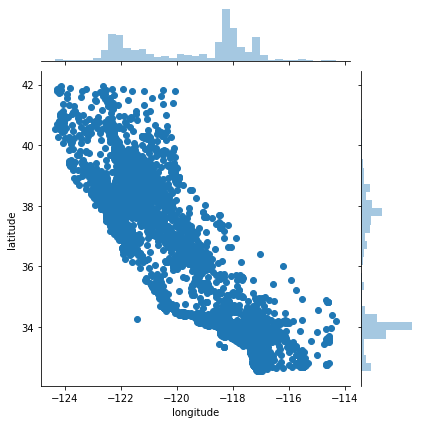

In [176]:
# Немного забегаем вперед
sns.jointplot(df['longitude'], df['latitude'])

In [177]:
# Добавление признака принадлежности к одному из городов
df['City'] = np.where((df['longitude'] <= -120) & (df['latitude'] >= 36), 1, 0)

### Сохранение результатов

In [178]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,City
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0,1


In [179]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

#### Курсовой датасет (введение)

In [139]:
TRAIN_DATASET_PATH = 'train.csv'

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [142]:
df = pd.read_csv(TRAIN_DATASET_PATH)

In [144]:
df.shape

(10000, 20)

In [143]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [141]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
